In [1]:
!pip install tqdm

In [97]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [98]:
class MLP:
    def __init__(self, train_data, target, lr=0.1, num_epochs=100, num_input=2, num_hidden=2, num_output=1):
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs

        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))

        self.b01 = np.random.uniform(size=(1,num_hidden))
        self.b12 = np.random.uniform(size=(1,num_output))

        self.losses = []

    def update_weights(self):
        
        loss = 0.5 * (self.target - self.output_final) ** 2
        print(loss)
        self.losses.append(np.sum(loss))

        error_term = (self.target - self.output_final.T).T
        
        print(error_term.shape)
        print(self._delsigmoid(self.output_final.T).shape)
        
        grad01 = self.train_data.T @ (((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out))
        print("grad01: ", grad01)
        print(grad01.shape)

        grad12 = self.hidden_out.T @ (error_term * self._delsigmoid(self.output_final))

        print("grad12: ", grad12)
        print(grad12.shape)

        self.weights_01 += self.lr * grad01
        self.weights_12 += self.lr * grad12

        self.b01 += np.sum(self.lr * ((error_term * self._delsigmoid(self.output_final)) * self.weights_12.T) * self._delsigmoid(self.hidden_out), axis=0)
        self.b12 += np.sum(self.lr * error_term * self._delsigmoid(self.output_final), axis=0)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _delsigmoid(self, x):
        return x * (1 - x)

    def forward(self, batch):
        
        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = self._sigmoid(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = self._sigmoid(self.output_)

        return self.output_final

    def classify(self, datapoint):
        
        datapoint = np.transpose(datapoint)
        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def plot(self, h=0.01):
       
        sns.set_style('darkgrid')
        plt.figure(figsize=(20, 20))

        plt.axis('scaled')
        plt.xlim(-0.1, 1.1)
        plt.ylim(-0.1, 1.1)

        colors = {
            0: "ro",
            1: "go"
        }

        for i in range(len(self.train_data)):
            plt.plot([self.train_data[i][0]],
                     [self.train_data[i][1]],
                     colors[self.target[i][0]],
                     markersize=20)

        x_range = np.arange(-0.1, 1.1, h)
        y_range = np.arange(-0.1, 1.1, h)

        xx, yy = np.meshgrid(x_range, y_range, indexing='ij')
        Z = np.array([[self.classify([x, y]) for x in x_range] for y in y_range])

        plt.contourf(xx, yy, Z, colors=['red', 'green', 'green', 'blue'], alpha=0.4)

    def train(self):

        for _ in range(self.num_epochs):
            self.forward(self.train_data)
            self.update_weights()

In [99]:
import ttg
def AND_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' and '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;

def OR_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' or '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;

def XOR_Dataset(n):
    string = []
    for i in range(n):
        string.append(str(i))
    result = []
    s = ''
    for i in range(len(string)-1):
        s += string[i] + ' xor '
    s += string[len(string)-1]
    result.append(s)
    table = ttg.Truths(string, result)
    data = table.as_pandas()
    data.rename(columns={s:'output'}, inplace = True)
    return data;

df = XOR_Dataset(2)
df

,0,1,output
1,1,1,0
2,1,0,1
3,0,1,1
4,0,0,0


In [100]:
from itertools import permutations
l = np.array(list(permutations(range(1, 5))))
hi = []
for i in tqdm(range(l.shape[0]), desc="Loading...", ascii=False, ncols=75):
    hi.append(np.array(df.reindex(l[i])))

Loading...: 100%|████████████████████████| 24/24 [00:00<00:00, 4010.33it/s]


In [101]:
X = np.array(hi[0][:, 0:2], dtype='int32')
Y = np.array(hi[0][:, 2], dtype='int32')

In [102]:
mlp = MLP(X, Y, 0.2, 5000)
mlp.train()

[[0.39522623 0.0061523  0.0061523  0.39522623]
 [0.39105476 0.0066852  0.0066852  0.39105476]
 [0.3806569  0.00812392 0.00812392 0.3806569 ]
 [0.37542353 0.00890921 0.00890921 0.37542353]]
(4, 1)
(1, 4)
grad01:  [[-0.01248209 -0.00992572]
 [-0.01194517 -0.00923437]]
(2, 2)
grad12:  [[-0.10692541]
 [-0.10434557]]
(2, 1)
[[0.38931472 0.0069149  0.0069149  0.38931472]
 [0.38511405 0.00748765 0.00748765 0.38511405]
 [0.37461629 0.00903407 0.00903407 0.37461629]
 [0.36939312 0.00986637 0.00986637 0.36939312]]
(4, 1)
(1, 4)
grad01:  [[-0.01263585 -0.0099687 ]
 [-0.01207575 -0.00924541]]
(2, 2)
grad12:  [[-0.10975374]
 [-0.10717185]]
(2, 1)
[[0.38299137 0.00778697 0.00778697 0.38299137]
 [0.3787694  0.00840235 0.00840235 0.3787694 ]
 [0.36819558 0.01006321 0.01006321 0.36819558]
 [0.36299309 0.01094486 0.01094486 0.36299309]]
(4, 1)
(1, 4)
grad01:  [[-0.01275521 -0.00997737]
 [-0.01217245 -0.00922232]]
(2, 2)
grad12:  [[-0.11248907]
 [-0.10991461]]
(2, 1)
[[0.37624081 0.00878383 0.00878383 0.

IndexError: invalid index to scalar variable.

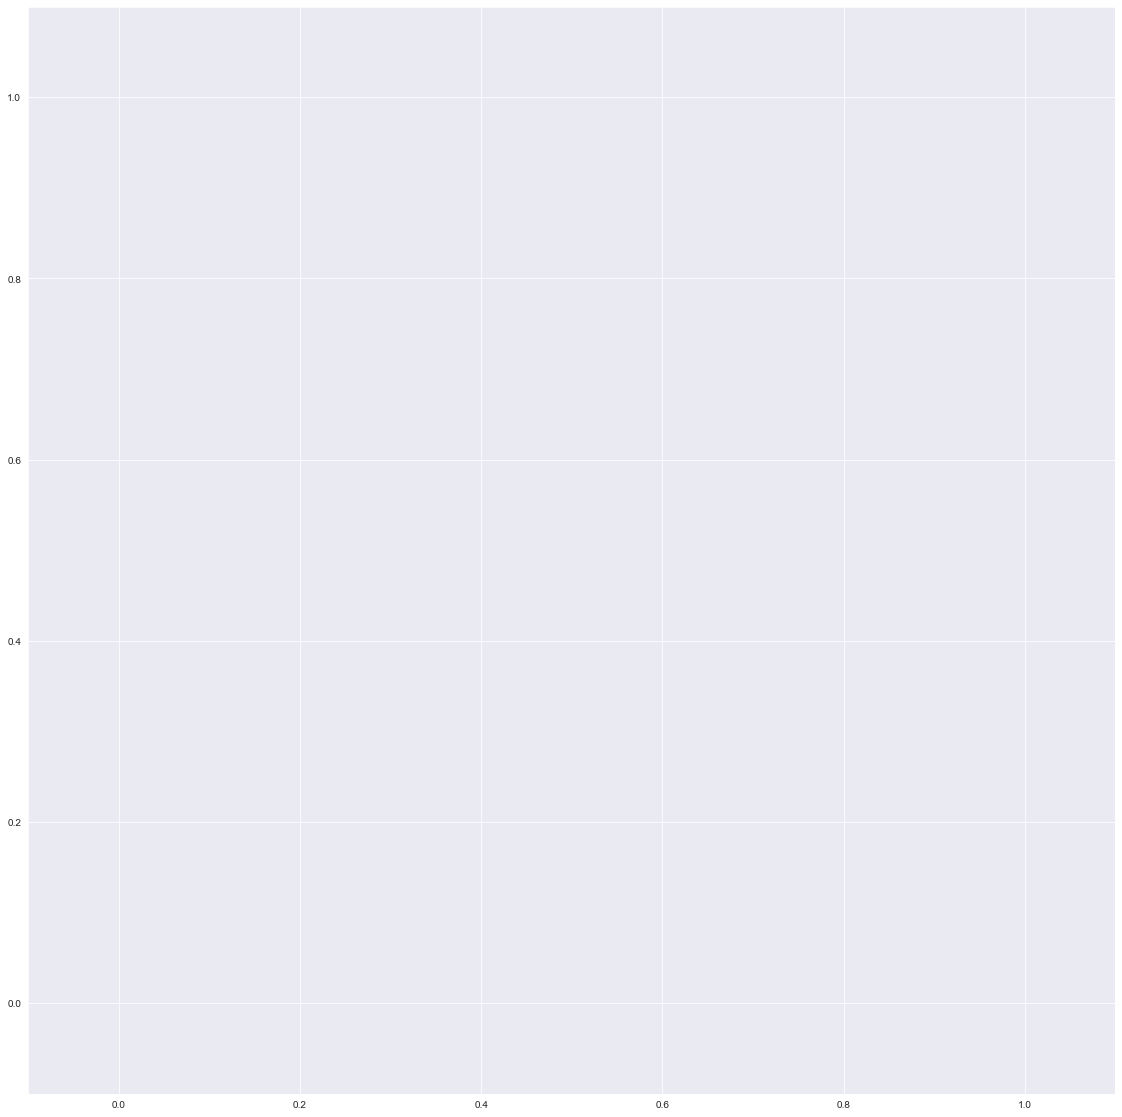

In [103]:
mlp.plot()

In [36]:
output = []
for i in tqdm(range(len(hi)), desc="Loading...", ascii=False, ncols=75):
    X = np.array(hi[i][:, 0:2], dtype='int32')
    Y = np.array(hi[i][:, 2], dtype='int32')
    perceptron = Perceptron()
    no_of_epochs = perceptron.fit(X, Y, 100, 0.01)
    output.append(no_of_epochs)
    
output

Loading...: 100%|██████████████████████████| 24/24 [00:00<00:00, 74.00it/s]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

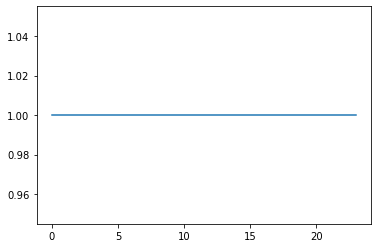

In [37]:
plt.plot(output)